In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data=pd.read_csv('/content/earthquake_data_tsunami.csv')
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [53]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [54]:
data.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [55]:
data['tsunami'].value_counts()

,count
tsunami,
0,478
1,304


In [56]:
data.isnull().mean()*100

,0
magnitude,0.0
cdi,0.0
mmi,0.0
sig,0.0
nst,0.0
dmin,0.0
gap,0.0
depth,0.0
latitude,0.0
longitude,0.0


In [57]:
data.shape

(782, 13)

In [58]:
data.drop_duplicates(inplace=True)

In [59]:
data.shape

(782, 13)

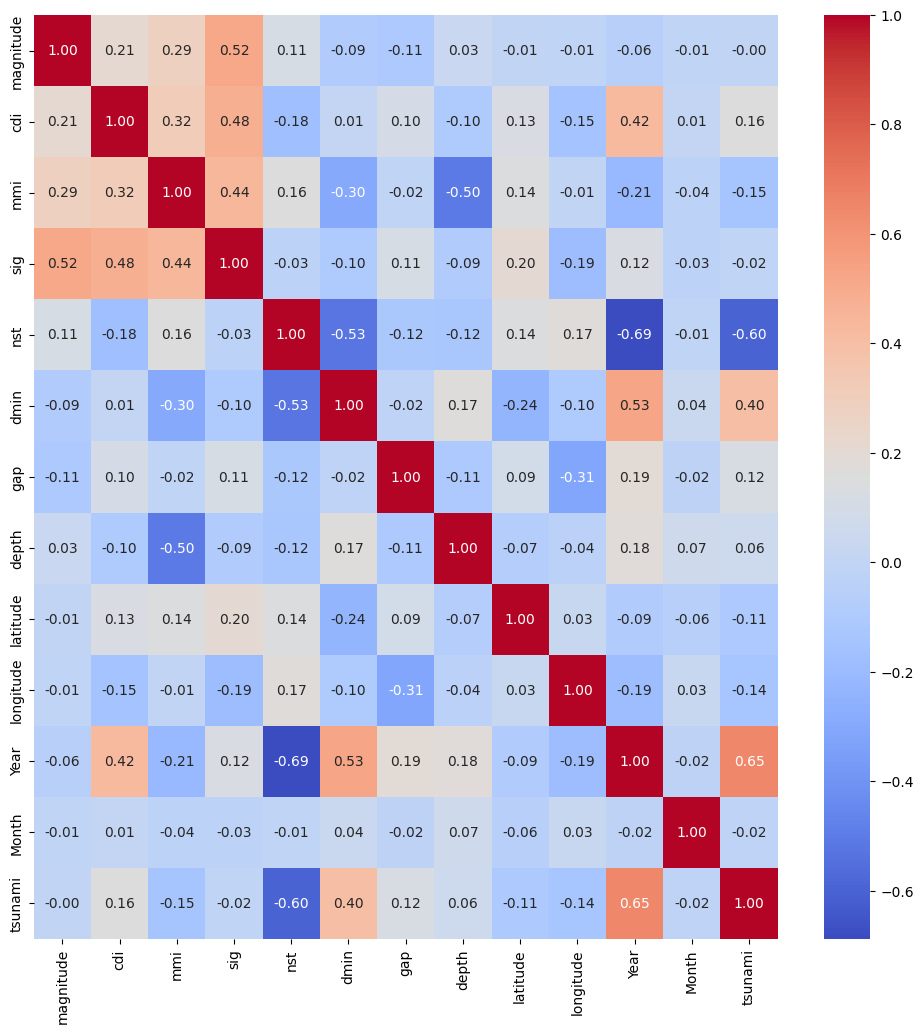

In [60]:
corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

In [61]:
data=data.drop('Year',axis=1)

In [62]:
tar_corr_var=data.corr()['tsunami']
top_features=tar_corr_var.abs().sort_values(ascending=False).head(8)
top_features

,tsunami
tsunami,1.000000
nst,0.600231
dmin,0.400752
cdi,0.160266
mmi,0.147363
longitude,0.136778
gap,0.116360
latitude,0.113209


/tmp/ipython-input-4130447536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features.index, x=top_features.values, palette='coolwarm')


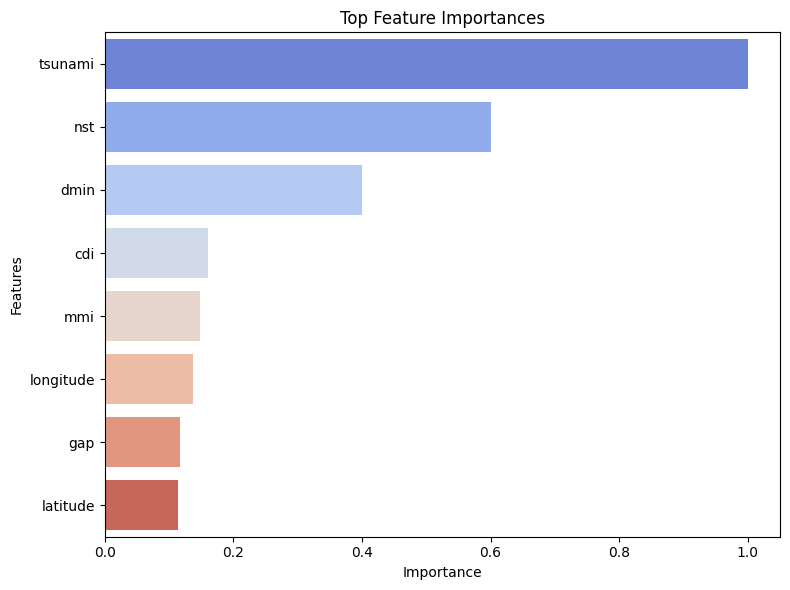

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_features.index, x=top_features.values, palette='coolwarm')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

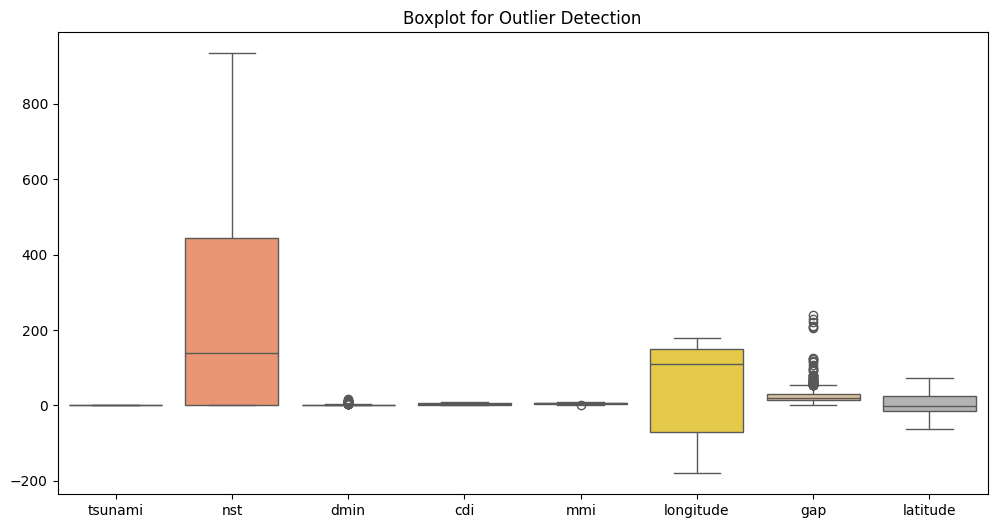

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']], palette='Set2')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [65]:
data[top_features.index].columns

Index(['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude'], dtype='object')

In [66]:
features=['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']

In [67]:
final_data=data[features]

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [70]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1,random_state=42)
final_data['anomaly'] = iso.fit_predict(final_data[features])

print(final_data['anomaly'].value_counts())
final_data_d = final_data[final_data['anomaly'] == 1].drop(columns='anomaly')

anomaly
 1    703
-1     79
Name: count, dtype: int64


/tmp/ipython-input-2014707143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['anomaly'] = iso.fit_predict(final_data[features])


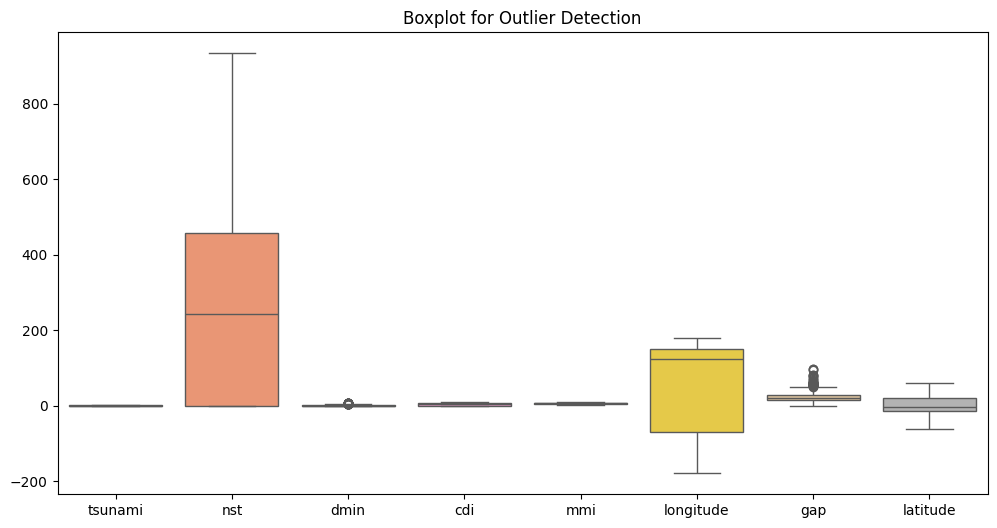

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data_d[['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']], palette='Set2')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [72]:
print(final_data.shape)
print(final_data_d.shape)


(782, 9)
(703, 8)


In [73]:
x=final_data_d.drop('tsunami',axis=1)
y=final_data_d['tsunami']

In [74]:
sc=StandardScaler()
data_final=sc.fit_transform(x)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
smote=SMOTE(random_state=42)
x_train_bal,y_train_bal=smote.fit_resample(x_train,y_train)

In [77]:
print(y_train.value_counts())
print(y_train_bal.value_counts())

tsunami
0    359
1    203
Name: count, dtype: int64
tsunami
0    359
1    359
Name: count, dtype: int64


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [79]:
lg_model=LogisticRegression()
lg_model.fit(x_train_bal,y_train_bal)
y_pred=lg_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        86
           1       0.71      0.89      0.79        55

    accuracy                           0.82       141
   macro avg       0.81      0.83      0.81       141
weighted avg       0.84      0.82      0.82       141



In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model_rf=RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train_bal,y_train_bal)
y_pred_rf=model_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        86
           1       0.80      0.89      0.84        55

    accuracy                           0.87       141
   macro avg       0.86      0.88      0.87       141
weighted avg       0.88      0.87      0.87       141



In [83]:
from xgboost import XGBClassifier

In [84]:
model_xg=XGBClassifier()
model_xg.fit(x_train_bal,y_train_bal)
y_pred_xg=model_xg.predict(x_test)

In [85]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        86
           1       0.82      0.89      0.85        55

    accuracy                           0.88       141
   macro avg       0.87      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



In [86]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(x_train_bal, y_train_bal)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.70      0.91      0.79        55

    accuracy                           0.82       141
   macro avg       0.82      0.83      0.81       141
weighted avg       0.84      0.82      0.82       141



In [87]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the balanced training data
grid_search.fit(x_train_bal, y_train_bal)

# Print the best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf_tuned = best_rf_model.predict(x_test)

# Print the classification report for the tuned model
print(classification_report(y_test, y_pred_rf_tuned))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        86
           1       0.80      0.89      0.84        55

    accuracy                           0.87       141
   macro avg       0.86      0.88      0.87       141
weighted avg       0.88      0.87      0.87       141



In [88]:
import pickle

with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

In [89]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.8 MB/s eta 0:00:00


In [90]:
['tsunami','nst','dmin','cdi','mmi','longitude','gap','latitude']

['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']

In [104]:
!pip install scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 48.0 MB/s eta 0:00:00


In [108]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have saved your trained model as 'best_rf_model.pkl'
with open('best_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Tsunami Prediction App')

st.write('This app predicts the likelihood of a tsunami based on earthquake parameters.')

# Add input widgets for features (replace with your actual features)
# magnitude = st.slider('Magnitude', 0.0, 10.0, 7.0)
cdi = st.slider('CDI', 0, 10, 5)
mmi = st.slider('MMI', 0, 10, 5)
# sig = st.slider('Sig', 0, 3000, 800)
nst = st.slider('NST', 0, 1000, 200)
dmin = st.slider('Dmin', 0.0, 20.0, 1.0)
gap = st.slider('Gap', 0.0, 300.0, 25.0)
# depth = st.slider('Depth', 0.0, 700.0, 70.0)
latitude = st.slider('Latitude', -90.0, 90.0, 0.0)
longitude = st.slider('Longitude', -180.0, 180.0, 0.0)
# month = st.slider('Month', 1, 12, 6)


# Create a dataframe from user inputs, ensuring the order matches the trained model
input_data = pd.DataFrame({
    'nst': [nst],
    'dmin': [dmin],
    'cdi': [cdi],
    'mmi': [mmi],
    'longitude': [longitude],
    'gap': [gap],
    'latitude': [latitude]
})

# Make prediction (uncomment after making prediction)
prediction = model.predict(input_data)

# Display prediction (uncomment after making prediction)
if prediction[0] == 1:
    st.write('Prediction: Tsunami likely')
else:
    st.write('Prediction: No tsunami likely')


Overwriting app.py


In [109]:
import subprocess
import re

# Install pyngrok if not already installed
!pip install pyngrok -q
from pyngrok import ngrok

# Set your ngrok authtoken (replace YOUR_NGROK_AUTHTOKEN with your actual token)
ngrok.set_auth_token("36sEsh01SKXSkOeQFLvdNHMyMLn_5AMDaTGupbVPU3sPYFJCe")

# Terminate any existing ngrok tunnels
ngrok.kill()

# Start a new ngrok tunnel
# Streamlit usually runs on port 8501
public_url = ngrok.connect(addr='8501', proto='http')

# Run the Streamlit app in the background
# The output of the streamlit run command will be captured
process = subprocess.Popen(['streamlit', 'run', 'app.py'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print(f"Your Streamlit app is running at: {public_url}")
print("To stop the app, interrupt this cell's execution.")

Your Streamlit app is running at: NgrokTunnel: "https://decoctive-carolynn-uncommutable.ngrok-free.dev" -> "http://localhost:8501"
To stop the app, interrupt this cell's execution.
